# First Kaggle challenge - Titanic

![](../img/titanic.jpg)

## Machine Learning from Disaster

- v1.1_042020
- author: marcusRB
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)



Esta es la legendaria competición de Titanic ML: el mejor primer desafío para que te sumerjas en las competencias ML y te familiarices con el funcionamiento de la plataforma Kaggle.

La competencia es simple: use el aprendizaje automático para crear un modelo que prediga qué pasajeros sobrevivieron al naufragio del Titanic.

### The Challenge

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el ampliamente considerado "insumergible" RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de 2224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

### What Data Will I Use in This Competition?
En esta competición, obtendrá acceso a dos conjuntos de datos similares que incluyen información de pasajeros como nombre, edad, sexo, clase socioeconómica, etc. Un conjunto de datos se titula `train.csv` y el otro se titula `test.csv` .

Train.csv contendrá los detalles de un subconjunto de los pasajeros a bordo (891 para ser exactos) y, lo que es más importante, revelará si sobrevivieron o no, también conocida como la "verdad fundamental".

El conjunto de datos `test.csv` contiene información similar pero no revela la" verdad fundamental "para cada pasajero. Es su trabajo predecir estos resultados.

Usando los patrones que encuentra en los datos de train.csv, prediga si los otros 418 pasajeros a bordo (que se encuentran en test.csv) sobrevivieron.


## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [2]:
# Check the versions of libraries Win10 Docker - en caso de instalar nuevos paquetes o actualizaciones
#!pip install --upgrade pandas
#!pip install --upgrade sklearn
#!pip install keras
#!pip install tensorflow

***

## Import Libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

***

## Load dataset desde KAGGLE API

Kaggle tiene una API para interactuar directamente con las competiciones.
- https://github.com/Kaggle/kaggle-api

**IMPORTANTE** : Comentar las filas que no se utilizarán

In [4]:
# descargamos la libreria
!pip install --upgrade kaggle
import kaggle

Desde https://www.kaggle.com/USER/account descargamos el Token de KAGGLE - el fichero es kaggle.json y seguimos las instrucciones 

In [ ]:
# restringir los permisos del directorio
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

In [ ]:
!unzip -o titanic.zip

* * *
## Load dataset download desde la web

In [5]:
# Load dataset train and test
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

# concat these two datasets, this will come handy while processing the data
#titanic_list =  pd.concat(objs=[train_titanic, test_titanic], axis=0).reset_index(drop=True)
#titanic_list = [train_titanic, test_titanic]

***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [6]:
# Check train dataframe structure
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Check test dataframe rows and variables
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Check train dataframe basic stats data
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check test dataframe basic stats data
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


***

### EDA, Visualization and transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [10]:
# Check null and NA values for train dataset
na_values = train_titanic.isna().sum()
# Table of absolute frequency
na_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Table of relative frequency
train_titanic.isnull().sum()/len(train_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# Check null and NA values for test dataset
na_values = test_titanic.isna().sum()
# Table of absolute frequency
na_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# Table of relative frequency
test_titanic.isnull().sum()/len(test_titanic)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

#### `PassangerId`

Identificador del pasajero. Es una variable numerica correlativa, que no tiene ningún valor predictivo. No la incluiremos en nuestro modelo.

In [14]:
train_titanic['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

In [15]:
# Remove PassengerId variable
train_titanic.drop(['PassengerId'], axis=1, inplace=True)

#### `Survived`

Indica si el pasajero sobrevivió (`1`) o no (`0`). Será nuestra variable a predecir. Vemos que hay alrededor de un 38% de pasajeros que sobrevivieron.

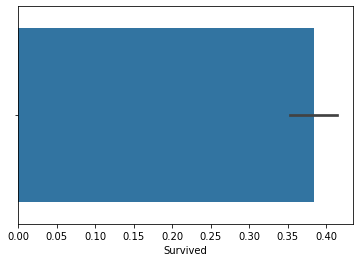

In [16]:
sns.barplot(x="Survived", data=train_titanic)

In [17]:
train_titanic.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### `Pclass`

Clase del tiquet. Es una variable categórica, con 3 valores diferentes correspondientes a la primera, la segunda y la tercera clase. Vemos que está correlacionada con la supervivencia: como más alta sea la clase, más supervivientes hay.

In [18]:
train_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


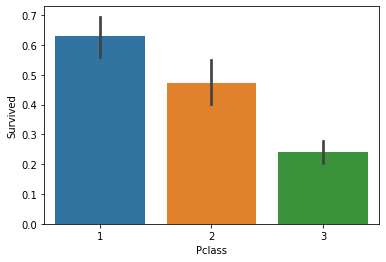

In [19]:
sns.barplot(x="Pclass", y="Survived", data=train_titanic)

#### `Sex`

Sexo del pasajero. Es una variable categórica con dos valores, `male` y `female`. La convertiremos a binaria para nuestro análisis.

In [20]:
train_titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


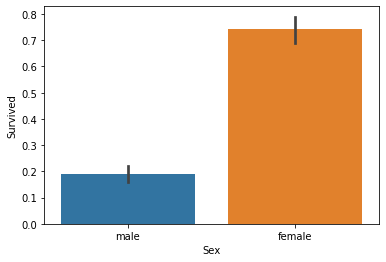

In [21]:
sns.barplot(x="Sex", y="Survived", data=train_titanic)

In [22]:
train_titanic['Sex'] = train_titanic['Sex'] == 'male'
test_titanic['Sex'] = test_titanic['Sex'] == 'male'

#### `SibSp`

Número de hermanos o cónyugues del pasajero dentro del Titanic. Es una variable numérica.

In [23]:
train_titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


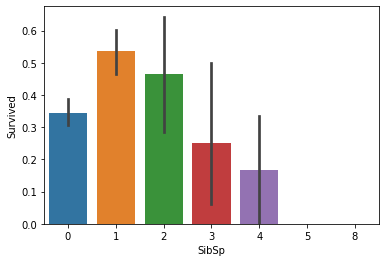

In [24]:
sns.barplot(x="SibSp", y="Survived", data=train_titanic)

#### `Parch`

Nombre de padres e hijos del pasajero dentro del Titanic. Es una variable numérica.

In [25]:
train_titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


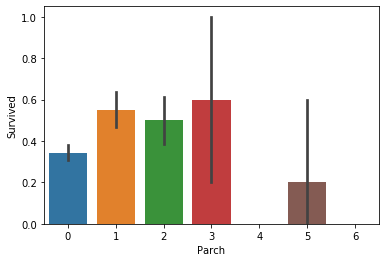

In [26]:
sns.barplot(x="Parch", y="Survived", data=train_titanic)

#### `FamilySize`

Con las variables `SibSp` y `Parch` podemos calcular el tamaño de la familia de un pasajero, que llamaremos `FamilySize`. Será pues, una variable numérica.

In [27]:
train_titanic['FamilySize'] = train_titanic['SibSp'] + train_titanic['Parch'] + 1
train_titanic[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


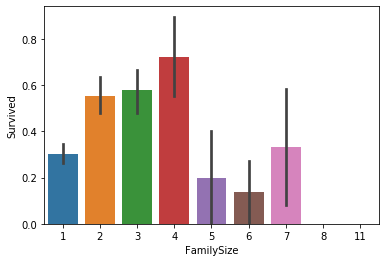

In [28]:
sns.barplot(x="FamilySize", y="Survived", data=train_titanic)

In [29]:
# Apply the same above for test_titanic
test_titanic['FamilySize'] = test_titanic['SibSp'] + test_titanic['Parch'] + 1

#### `IsAlone`

Puede ser interesante caracterizar si el pasajero no tiene familia dentro del Titanic. Calcularemos la variable binaria `IsAlone`.

In [30]:
train_titanic['IsAlone'] = 0
train_titanic.loc[train_titanic['FamilySize'] == 1, 'IsAlone'] = 1
train_titanic[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


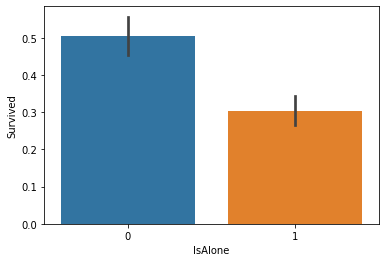

In [31]:
sns.barplot(x="IsAlone", y="Survived", data=train_titanic)

In [32]:
# Apply the same above for test_titanic
test_titanic['IsAlone'] = 0
test_titanic.loc[test_titanic['FamilySize'] == 1, 'IsAlone'] = 1

#### `Ticket`

Número del tiquet del pasajero. Es alfanumerica y a priori no ofrece información que nos pueda ayudar en el modelo predictivo. No la incluiremos.

In [33]:
# We remove Ticket variable in both traing and test dataset
train_titanic.drop(['Ticket'], axis=1, inplace=True)
test_titanic.drop(['Ticket'], axis=1, inplace=True)

In [34]:
train_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,7.2500,NaN,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,71.2833,C85,C,2,0
2,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,53.1000,C123,S,2,0
4,0,3,"Allen, Mr. William Henry",True,35.0,0,0,8.0500,NaN,S,1,1
5,0,3,"Moran, Mr. James",True,NaN,0,0,8.4583,NaN,Q,1,1
6,0,1,"McCarthy, Mr. Timothy J",True,54.0,0,0,51.8625,E46,S,1,1
7,0,3,"Palsson, Master. Gosta Leonard",True,2.0,3,1,21.0750,NaN,S,5,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False,27.0,0,2,11.1333,NaN,S,3,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",False,14.0,1,0,30.0708,NaN,C,2,0


In [35]:
test_titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",True,34.5,0,0,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",False,47.0,1,0,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",True,62.0,0,0,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",True,27.0,0,0,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,22.0,1,1,12.2875,NaN,S,3,0
5,897,3,"Svensson, Mr. Johan Cervin",True,14.0,0,0,9.2250,NaN,S,1,1
6,898,3,"Connolly, Miss. Kate",False,30.0,0,0,7.6292,NaN,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",True,26.0,1,1,29.0000,NaN,S,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False,18.0,0,0,7.2292,NaN,C,1,1
9,901,3,"Davies, Mr. John Samuel",True,21.0,2,0,24.1500,NaN,S,3,0


### `Embarked`

Indica el puerto de embarque del pasajero. Es una variable categórica donde `C` indica que embarcó en Cherbourg, `Q` en Queenstown y `S` en Southampton.

In [36]:
# Check ratio Embarked and Survived variable
train_titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [37]:
# Fill by frequency
train_titanic['Embarked'] = train_titanic['Embarked'].fillna('S')

In [38]:
# Check ratio Embarked and Survived variable
train_titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


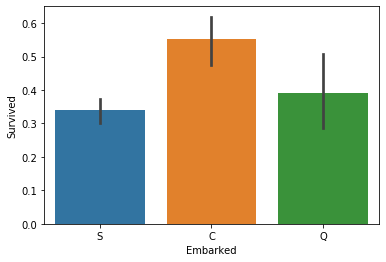

In [39]:
sns.barplot(x="Embarked", y="Survived", data=train_titanic)

In [40]:
# Apply the same above for test_titanic
test_titanic['Embarked'] = test_titanic['Embarked'].fillna('S')

#### `Fare`

Indica el precio del pasaje. Es pues, una variable numerica contínua.

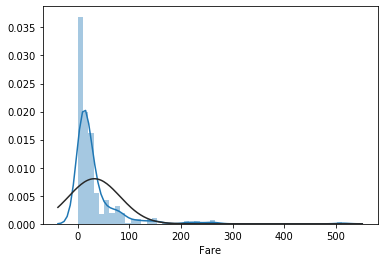

In [41]:
sns.distplot(train_titanic['Fare'], fit=norm)

Vemos que la variable no tiene una distribución normal. Aplicaremos el logaritmo para acercarla a la normalidad.

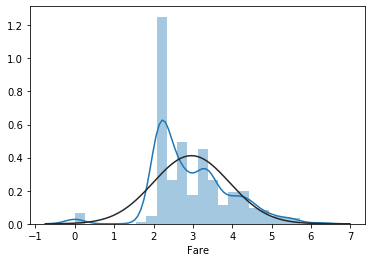

In [42]:
train_titanic['Fare'] = np.log1p(train_titanic['Fare'])
sns.distplot(train_titanic['Fare'], fit=norm)

Transformamos la variable a categorica.

In [43]:
train_titanic['FareGroup'] = pd.qcut(train_titanic['Fare'], 4, labels=['A', 'B', 'C', 'D'])
train_titanic[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.197309
1,B,0.303571
2,C,0.454955
3,D,0.581081


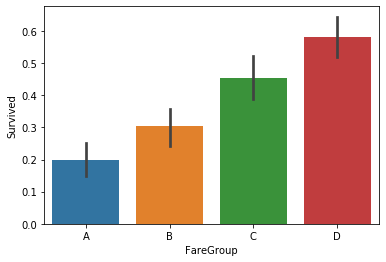

In [44]:
sns.barplot(x="FareGroup", y="Survived", data=train_titanic)

In [45]:
# Apply the same above for test_titanic
test_titanic['Fare'] = np.log1p(test_titanic['Fare'])
test_titanic['FareGroup'] = pd.qcut(test_titanic['Fare'], 4, labels=['A', 'B', 'C', 'D'])

In [46]:
# We remove the variable Fare
train_titanic.drop(['Fare'], axis=1, inplace=True)
test_titanic.drop(['Fare'], axis=1, inplace=True)

#### `Cabin`

Número de la cabina del pasajero. Es una variable de texto, que indica en qué cabina estaba el pasajero. Transformaremos la variable en una binaria dependiendo si el pasajero estaba en una cabina o no. 

In [47]:
train_titanic['InCabin'] = ~train_titanic['Cabin'].isnull()

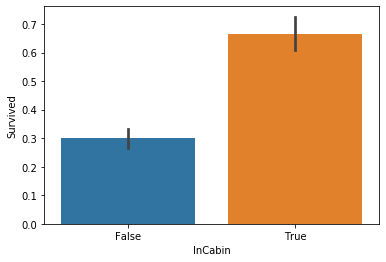

In [48]:
sns.barplot(x="InCabin", y="Survived", data=train_titanic)
plt.show()

In [49]:
# Apply the same above for test_titanic
test_titanic['InCabin'] = ~test_titanic['Cabin'].isnull()

In [50]:
# Check unique Cabin
pd.unique(train_titanic['Cabin'])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
# Count values
train_titanic["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E12            1
A7             1
A6             1
B37            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
#Turning cabin number into Deck
train_titanic["Cabin_Data"] = train_titanic["Cabin"].isnull().apply(lambda x: not x)
test_titanic["Cabin_Data"] = test_titanic["Cabin"].isnull().apply(lambda x: not x)

In [53]:
# Create Deck and Room
train_titanic["Deck"] = train_titanic["Cabin"].str.slice(0,1)
train_titanic["Room"] = train_titanic["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
train_titanic[train_titanic["Cabin_Data"]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Cabin_Data,Deck,Room
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,C85,C,2,0,D,True,True,C,85.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,C123,S,2,0,D,True,True,C,123.0
6,0,1,"McCarthy, Mr. Timothy J",True,54.0,0,0,E46,S,1,1,D,True,True,E,46.0
10,1,3,"Sandstrom, Miss. Marguerite Rut",False,4.0,1,1,G6,S,3,0,C,True,True,G,6.0
11,1,1,"Bonnell, Miss. Elizabeth",False,58.0,0,0,C103,S,1,1,C,True,True,C,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",False,47.0,1,1,D35,S,3,0,D,True,True,D,35.0
872,0,1,"Carlsson, Mr. Frans Olof",True,33.0,0,0,B51 B53 B55,S,1,1,A,True,True,B,51.0
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",False,56.0,0,1,C50,C,2,0,D,True,True,C,50.0
887,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,B42,S,1,1,C,True,True,B,42.0


In [54]:
# Create Deck and Room
test_titanic["Deck"] = test_titanic["Cabin"].str.slice(0,1)
test_titanic["Room"] = test_titanic["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
test_titanic[test_titanic["Cabin_Data"]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Cabin_Data,Deck,Room
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",False,23.0,1,0,B45,S,2,0,D,True,True,B,45.0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",False,47.0,1,0,E31,S,2,0,D,True,True,E,31.0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",False,48.0,1,3,B57 B59 B63 B66,C,5,0,D,True,True,B,57.0
26,918,1,"Ostby, Miss. Helene Ragnhild",False,22.0,0,1,B36,C,2,0,D,True,True,B,36.0
28,920,1,"Brady, Mr. John Bertram",True,41.0,0,0,A21,S,1,1,C,True,True,A,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",True,43.0,1,0,D40,C,2,0,C,True,True,D,40.0
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",True,20.0,0,0,D38,C,1,1,B,True,True,D,38.0
407,1299,1,"Widener, Mr. George Dunton",True,50.0,1,1,C80,C,3,0,D,True,True,C,80.0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",False,37.0,1,0,C78,Q,2,0,D,True,True,C,78.0


Now we'll deal with the missing values. For the deck column we will replace the null values with an unused letter to represent lack of data. For the room number we will simply use the mean.

In [55]:
train_titanic["Deck"] = train_titanic["Deck"].fillna("N")
train_titanic["Room"] = round(train_titanic["Room"].fillna(train_titanic["Room"].mean()),0).astype("int")

In [56]:
test_titanic["Deck"] = test_titanic["Deck"].fillna("N")
test_titanic["Room"] = round(test_titanic["Room"].fillna(test_titanic["Room"].mean()),0).astype("int")

In [57]:
train_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Cabin_Data,Deck,Room
0,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,NaN,S,2,0,A,False,False,N,50
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,C85,C,2,0,D,True,True,C,85
2,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,NaN,S,1,1,B,False,False,N,50
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,C123,S,2,0,D,True,True,C,123
4,0,3,"Allen, Mr. William Henry",True,35.0,0,0,NaN,S,1,1,B,False,False,N,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,NaN,S,1,1,B,False,False,N,50
887,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,B42,S,1,1,C,True,True,B,42
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,NaN,1,2,NaN,S,4,0,C,False,False,N,50
889,1,1,"Behr, Mr. Karl Howell",True,26.0,0,0,C148,C,1,1,C,True,True,C,148


In [58]:
# Check unique Deck
pd.unique(train_titanic['Deck'])

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [59]:
# Check unique Room
pd.unique(train_titanic['Room'])

array([ 50,  85, 123,  46,   6, 103,  56,  23,  78,  33,  30,  52,  28,
        83,  73,  31,   5,  10,  26, 110,  58, 101,  69,  47,  86,   2,
        19,   7,  49,   4,  32,  80,  36,  15,  93,  35,  87,  77,  67,
        94, 125,  99, 118,  22, 106,  65,  54,  57,  34,  18, 124,  91,
        40, 128,  37,  82,  96,  44, 104, 111,  92,  38,  21,  12,  63,
        14,  20,  79,  25,  95,  39,  70,  16,  68,  41,   9,  48, 126,
        71,  51,  62,  24,  90,  45,   8, 121,  11,   3,  17, 102,  42,
       148])

In [60]:
train_titanic['Room'].describe()

count    891.000000
mean      50.109989
std       16.738075
min        2.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      148.000000
Name: Room, dtype: float64

In [61]:
bins = [0, 50, 75, 100, np.inf]
labels = ['r1', 'r2', 'r3', 'r4']
train_titanic['RoomGroup'] = pd.cut(train_titanic["Room"], bins, labels = labels)

In [62]:
test_titanic['RoomGroup'] = pd.cut(test_titanic["Room"], bins, labels = labels)

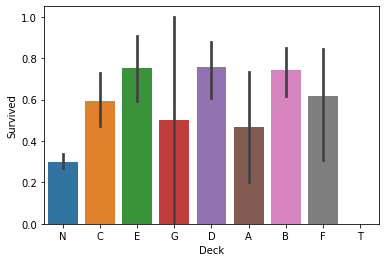

In [64]:
sns.barplot(x="Deck", y="Survived", data=train_titanic)

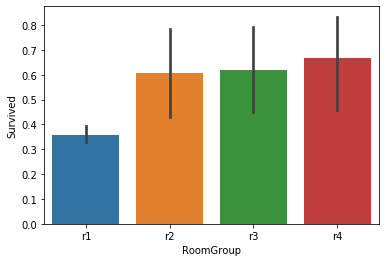

In [63]:
sns.barplot(x="RoomGroup", y="Survived", data=train_titanic)

In [65]:
# Remove variables except Deck
train_titanic.drop(["Cabin", "Cabin_Data", "Room"], axis=1, inplace=True, errors="ignore")
test_titanic.drop(["Cabin", "Cabin_Data", "Room"], axis=1, inplace=True, errors="ignore")

#### `Age`

Edad del pasajero. Es una variable numerica que tiene bastantes valores vacios. Categorizaremos la variable en 8 categorías según la edad que tenga. La categoría `Unknown` será la de aquellos pasajeros que no tengamos la edad.

In [66]:
train_titanic["Age"] = train_titanic["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_titanic['AgeGroup'] = pd.cut(train_titanic["Age"], bins, labels = labels)

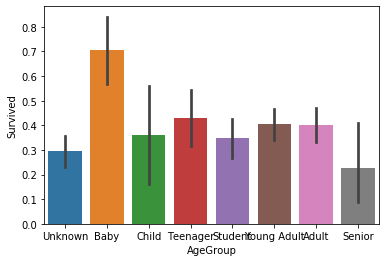

In [67]:
sns.barplot(x="AgeGroup", y="Survived", data=train_titanic)
plt.show()

In [68]:
# Apply the same above for test_titanic
test_titanic["Age"] = test_titanic["Age"].fillna(-0.5)
test_titanic['AgeGroup'] = pd.cut(train_titanic["Age"], bins, labels = labels)

In [69]:
# We remove the variable Age
train_titanic.drop(['Age'], axis=1, inplace=True)
test_titanic.drop(['Age'], axis=1, inplace=True)

#### `Name`

Nombre del pasajero. De esta variable podemos extraer los títulos incluidos con el nombre, como `Mr`, `Miss` o `Master`, que pueden tener valor predictivo. El resto del nombre, lo ignoraremos.

In [70]:
train_titanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [71]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply get_title function
train_titanic['Title'] = train_titanic['Name'].apply(get_title)
test_titanic['Title'] = test_titanic['Name'].apply(get_title)

# Check the results
pd.crosstab(train_titanic['Title'], train_titanic['Sex'])

Sex,False,True
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Categorizaremos aquellos títulos que sean mas usados, y el resto los agruparemos a una categoría `Rare`.

In [72]:
# Create a categorization on train dataset
train_titanic['Title'] = train_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_titanic['Title'] = train_titanic['Title'].replace('Mlle', 'Miss')
train_titanic['Title'] = train_titanic['Title'].replace('Ms', 'Miss')
train_titanic['Title'] = train_titanic['Title'].replace('Mme', 'Mrs')

# We create a relative table
train_titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [73]:
# Same above create a categorization on test dataset
test_titanic['Title'] = test_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_titanic['Title'] = test_titanic['Title'].replace('Mlle', 'Miss')
test_titanic['Title'] = test_titanic['Title'].replace('Ms', 'Miss')
test_titanic['Title'] = test_titanic['Title'].replace('Mme', 'Mrs')

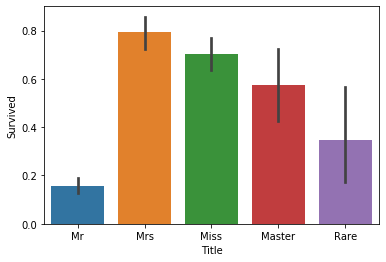

In [74]:
sns.barplot(x="Title", y="Survived", data=train_titanic)
plt.show()

In [75]:
# Remove Name variable
train_titanic.drop(['Name'], axis=1, inplace=True)
test_titanic.drop(['Name'], axis=1, inplace=True)

In [76]:
train_titanic.shape, test_titanic.shape

((891, 14), (418, 14))

## Save 1st EDA, Wrangle and Cleanse data part

To be continued 2nd part for features selection

In [77]:
# Save dataset0 and dataset1 for next step: Modeling
train_titanic.to_csv('train_titanic.csv', index=False)
test_titanic.to_csv('test_titanic.csv', index=False)

In [78]:
df1 = pd.read_csv("train_titanic.csv")
df1.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,0,3,True,1,0,S,2,0,A,False,N,r1,Student,Mr
1,1,1,False,1,0,C,2,0,D,True,C,r3,Adult,Mrs
2,1,3,False,0,0,S,1,1,B,False,N,r1,Young Adult,Miss
3,1,1,False,1,0,S,2,0,D,True,C,r4,Young Adult,Mrs
4,0,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
5,0,3,True,0,0,Q,1,1,B,False,N,r1,Unknown,Mr
6,0,1,True,0,0,S,1,1,D,True,E,r1,Adult,Mr
7,0,3,True,3,1,S,5,0,C,False,N,r1,Baby,Master
8,1,3,False,0,2,S,3,0,B,False,N,r1,Young Adult,Mrs
9,1,2,False,1,0,C,2,0,C,False,N,r1,Teenager,Mrs


In [79]:
df2 = pd.read_csv("test_titanic.csv")
df2.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,892,3,True,0,0,Q,1,1,A,False,N,r1,Student,Mr
1,893,3,False,1,0,S,2,0,A,False,N,r1,Adult,Mrs
2,894,2,True,0,0,Q,1,1,B,False,N,r1,Young Adult,Mr
3,895,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
4,896,3,False,1,1,S,3,0,B,False,N,r1,Young Adult,Mrs
5,897,3,True,0,0,S,1,1,B,False,N,r1,Unknown,Mr
6,898,3,False,0,0,Q,1,1,A,False,N,r1,Adult,Miss
7,899,2,True,1,1,S,3,0,C,False,N,r1,Baby,Mr
8,900,3,False,0,0,C,1,1,A,False,N,r1,Young Adult,Mrs
9,901,3,True,2,0,S,3,0,C,False,N,r1,Teenager,Mr
